In [3]:
import numpy as np
import pandas as pd
import requests
from astroquery.ned import Ned
from time import sleep
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import fits
from astropy.table import Table

In [4]:
# import all the data retrieve in the previous work book

mojave_id_df = pd.read_excel('MojaveData.xlsx')
mojave_id_df.head()

,B1950 Name,J2000 Name,Common Name,Right Asc. (J2000),Declination (J2000),z,Opt. ID,SED Class,Radio Spectrum,Fermi 3FGL Name
0,0003-066,J0006-0623,NRAO 005,00 06 13.893,- 06 23 35.335,0.3467,B,LSP,Flat,NaN
1,0007+106,J0010+1058,III Zw 2,00 10 31.006,+ 10 58 29.504,0.0893,G,LSP,Flat,NaN
2,0016+731,J0019+7327,S5 0016+73,00 19 45.786,+ 73 27 30.018,1.7810,Q,LSP,Flat,NaN
3,0048-097,J0050-0929,PKS 0048-09,00 50 41.317,- 09 29 05.210,0.6350,B,ISP,Flat,J0050.6-0929
4,0059+581,J0102+5824,TXS 0059+581,01 02 45.762,+ 58 24 11.137,0.6440,Q,LSP,Flat,J0102.8+5825


In [5]:
mojave_photo_df = pd.read_excel('MojavePhotometry.xlsx')
mojave_photo_df.head()

,0.1-10 GeV (Fermi),0.1-100 GeV (Fermi),0.1-2.4 keV (Fermi),0.1-2.4 keV (ROSAT),0.1-2.4 keV (Swift),0.15-3.5 keV (IPC),0.2 keV (Einstein),0.2-10 keV (Swift),0.2-10 keV (XMM),0.2-2 keV (ROSAT),...,u (SDSS) AB,z (KPNO),z (SDSS CModel) AB,z (SDSS Model) AB,z (SDSS PSF) AB,z (SDSS Petrosian)AB,z (SDSS) AB,z' (GROND) AB,z' (SOAR) AB,Source Name
0,NaN,NaN,NaN,5.320000e-07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0003-066
1,NaN,NaN,NaN,2.030000e-06,0.000002,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0007+106
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0016+731
3,NaN,3.570000e-13,7.720000e-07,1.290000e-06,NaN,NaN,NaN,NaN,NaN,0.000002,...,NaN,NaN,NaN,NaN,0.00211,NaN,NaN,0.00273,NaN,0048-097
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0059+581


In [7]:
lat_id_df = pd.read_excel('gll_psc_v16.xlsx')
lat_id_df.head()

,Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,...,1FHL_Name,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,ASSOC1,ASSOC2,Flags
0,3FGL J0000.1+6545,0.0377,65.751701,117.693878,3.402958,0.062845,0.048105,41.029999,0.1019,0.0780,...,,,,,N,,blank,,,4
1,3FGL J0000.2-3738,0.0612,-37.648399,345.410522,-74.946754,0.045083,0.041691,-88.550003,0.0731,0.0676,...,,,,,N,,blank,,,0
2,3FGL J0001.0+6314,0.2535,63.243999,117.293091,0.925701,0.152640,0.098553,-65.320000,0.2475,0.1598,...,,,,,N,,spp,,,28
3,3FGL J0001.2-0748,0.3209,-7.815900,89.022202,-67.324249,0.050325,0.042924,-19.469999,0.0816,0.0696,...,,,,,N,,BLL,PMN J0001-0746,,0
4,3FGL J0001.4+2120,0.3612,21.337900,107.665428,-40.047157,0.129821,0.116191,-32.549999,0.2105,0.1884,...,,,3EG J2359+2041,,N,,FSRQ,TXS 2358+209,,0


In [11]:
pd.set_option('display.max_rows', 100)
lat_id_df.dtypes

Source_Name              object
RAJ2000                 float64
DEJ2000                 float64
GLON                    float64
GLAT                    float64
Conf_68_SemiMajor       float64
Conf_68_SemiMinor       float64
Conf_68_PosAng          float64
Conf_95_SemiMajor       float64
Conf_95_SemiMinor       float64
Conf_95_PosAng          float64
ROI_num                   int64
Signif_Avg              float64
Pivot_Energy            float64
Flux_Density            float64
Unc_Flux_Density        float64
Flux1000                float64
Unc_Flux1000            float64
Energy_Flux100          float64
Unc_Energy_Flux100      float64
Signif_Curve            float64
SpectrumType             object
Spectral_Index          float64
Unc_Spectral_Index      float64
beta                    float64
Unc_beta                float64
Cutoff                  float64
Unc_Cutoff              float64
Exp_Index               float64
Unc_Exp_Index           float64
PowerLaw_Index          float64
Flux30_1

In [8]:
lat_photo_df = pd.read_excel('LATPhotometry.xlsx')
lat_photo_df.head()

,0.1-100 GeV (Fermi),0.1-2 keV (XMM),0.1-2.4 keV (Fermi),0.1-2.4 keV (ROSAT),0.1-2.4 keV (Swift),0.13-0.18 keV (EUVE),0.15-3.5 keV (IPC),0.2 keV (Einstein),0.2-10 keV (Swift),0.2-10 keV (XMM),...,u (SDSS) AB,z (KPNO),z (SDSS CModel) AB,z (SDSS Model) AB,z (SDSS PSF) AB,z (SDSS Petrosian)AB,z (SDSS) AB,z' (GROND) AB,z' (SOAR) AB,Source Name
0,2.110000e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3FGL J0009.3+5030
1,1.600000e-13,NaN,2.660000e-07,4.110000e-07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3FGL J0017.6-0512
2,4.300000e-14,NaN,NaN,1.950000e-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3FGL J0018.4+2947
3,8.350000e-14,NaN,NaN,2.230000e-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3FGL J0018.9-8152
4,2.040000e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3FGL J0022.5+0608


## Redshifts and Luminosity Distances

Since Flux Density varies with distance to the object, I need to claculate luminosity distances for each recovered redshift. This is first done by retrieving the unknown redshift data from the NED database, and adding that data to the corresponding data frame. Any redshifts that are still missing will be estimated at the mean value for that sample.

Once these data are added, I created a function to calculate the Luminosity Distances in Mpc (D. Hogg, 1999, https://arxiv.org/abs/astro-ph/9905116). For this study, which focuses on the Data Science aspect, I need only transform the data such that it removes obervational bias. I will leave transorming the data into standard SI (metric) based units for when this is presented in am astronomy publication, since the Machine Learning algorithms are agnostic to unit systems. 

In [49]:
#lat_photo_df["z"] = np.nan

In [51]:
"""
# This loop will pull the first redshift measurement out of the NEd database. 
#I will adjust it to claculate a median at a later date
for name in lat_photo_df['Source Name']:
    try:
        result_table = Ned.get_table(name, table='redshifts')
        redshift_array = result_table.as_array()
        z = redshift_array[0,][4] #Documentation on NED was vague, it took some trial and error to figure out how to index this
        lat_photo_df.loc[lat_photo_df['Source Name'] == name, 'z'] = z
        sleep(1)
    except:
        print(name)
        sleep(1)
        continue
"""

3FGL J0009.3+5030 
3FGL J0018.9-8152 
3FGL J0022.5+0608 
3FGL J0034.3-0534 
3FGL J0045.7+1217 
3FGL J0051.2-6241 
3FGL J0054.8-2455 
3FGL J0103.4+5336 
3FGL J0103.7+1323 
3FGL J0109.8+6132 
3FGL J0134.5+2638 
3FGL J0136.5+3905 
3FGL J0144.6+2705 
3FGL J0154.0+0824 
3FGL J0154.9+4433 
3FGL J0157.0-5301 
3FGL J0158.6-3931 
3FGL J0205.5+6448 
3FGL J0237.5-3603 
3FGL J0238.0+5237 
3FGL J0240.5+6113 
3FGL J0243.5+7119 
3FGL J0250.6+1713 
3FGL J0250.6+5630 
3FGL J0316.1+0904 
3FGL J0335.3-4459 
3FGL J0340.3+4130 
3FGL J0419.1+6636 
3FGL J0423.8+4150 
3FGL J0425.0-5331 
3FGL J0434.4-2341 
3FGL J0440.8+2751 
3FGL J0448.6-1632 
3FGL J0456.3+2702 
3FGL J0506.9-5435 
3FGL J0509.4+0541 
3FGL J0521.7+0103 
3FGL J0521.7+2113 
3FGL J0525.6-6013 
3FGL J0526.6-6825e
3FGL J0532.0-4827 
3FGL J0534.5+2201 
3FGL J0538.4-3909 
3FGL J0540.4+5823 
3FGL J0543.9-5531 
3FGL J0558.6-7459 
3FGL J0604.1-4817 
3FGL J0607.4+4739 
3FGL J0612.8+4122 
3FGL J0617.2+5701 
3FGL J0617.2+2234e
3FGL J0622.9+3326 
3FGL J0625.2

In [197]:
lat_photo_df['z'] = lat_photo_df['z'].fillna(lat_photo_df['z'].mean())

In [198]:
lat_photo_df['z'].describe()

count    486.000000
mean       0.793286
std        0.499732
min        0.000000
25%        0.519023
50%        0.793286
75%        0.815750
max        3.033000
Name: z, dtype: float64

In [57]:
from scipy.integrate import quad

In [83]:
#This function transforms a redshift to a luminosity distance in Mpc.
#It is in close agreement with http://www.astro.ucla.edu/~wright/CosmoCalc.html (see below)
#It assumes a Flat universe with Lambda CDM cosmology
def D_L(z):
    #Using a Standard Lambda Cold Dark Matter Cosmology (https://arxiv.org/abs/1811.02374), assuming omega_r = 0 
    omega_m = 0.286 # matter parameter
    h = 69.6 #Hubble Constant in km*s^-1*Mpc^-1 
    c= 299792 # speed of light in km/s
    omega_v = 0.714 #vacuum paramter such that omega_m + omega_v = 1
    invE = lambda x: (omega_m*(1+x)**3 + omega_v)**(-0.5)
    dh = c/h # Hubble Distance in Mpc
    D_m = dh*quad(invE, 0,z)[0]
    
    return (1+z)*D_m
    

In [84]:
#A test run of the function vs http://www.astro.ucla.edu/~wright/CosmoCalc.html gives DL(0.5) = 2863 Mpc
D_L(0.5)

2863.178133890252

In [199]:
lat_photo_df['DL'] = lat_photo_df.apply(lambda row: D_L(row['z']), axis=1)

In [200]:
lat_photo_df['DL'].describe()

count      486.000000
mean      5334.941448
std       4093.555391
min          0.000000
25%       2995.018999
50%       5030.349863
75%       5206.901008
max      26274.773404
Name: DL, dtype: float64

In [89]:
lat_dl = lat_photo_df['DL'].dropna()

C:\Users\Nate\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


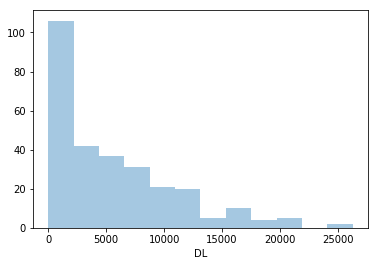

In [201]:
sns.distplot(lat_dl, kde=False)

In [202]:
mojave_id_df['z'] = mojave_id_df['z'].fillna(mojave_id_df['z'].mean())

In [203]:
mojave_id_df['DL'] = mojave_id_df.apply(lambda row: D_L(row['z']), axis=1)

In [204]:
mojave_id_df['DL'].describe()

count      232.000000
mean      7542.296885
std       5770.237448
min         18.844296
25%       3353.036006
50%       6885.370057
75%      10189.681971
max      30102.577643
Name: DL, dtype: float64

In [205]:
mojave_dl = mojave_id_df['DL'].dropna()

C:\Users\Nate\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


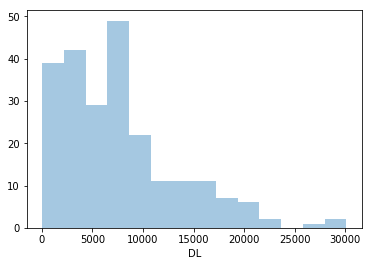

In [206]:
sns.distplot(mojave_dl, kde=False)

## Merging the Data For Analysis

At this point, I have all the data I need for the analysis. In this section I merge the data frames into one large data frame. In doing so, I neeed to trim away redundant sources from the MOJAVE and Fermi LAT surveys. I also need to drop sparse columns in the photometry data. I will retain columns that are 50% full or greater. I will the use a imputation technique to fill in missing values. 

In [122]:
#The last 3 columns I do not want dropped, so I have to slice accordingly
for column in lat_photo_df.iloc[:,:-3]:
    photo_series = lat_photo_df[column]
    empties = photo_series.isna().sum()
    sparcity = empties/photo_series.size
    if sparcity >= 0.5:
        #print(str(photo_series.name) + ": " + str(sparcity))
        lat_photo_df = lat_photo_df.drop([column], axis=1)
    else:
       print(str(photo_series.name) + ": " + str(sparcity)) 

0.1-100 GeV (Fermi): 0.102880658436214
1.4GHz: 0.3765432098765432
100 MeV-100 GeV LAT: 0.25308641975308643
4.85 GHz: 0.3271604938271605
W1 (WISE): 0.3477366255144033
W2 (WISE): 0.3477366255144033
W3 (WISE): 0.3477366255144033
W4 (WISE): 0.39711934156378603


In [123]:
lat_photo_df.shape

(486, 11)

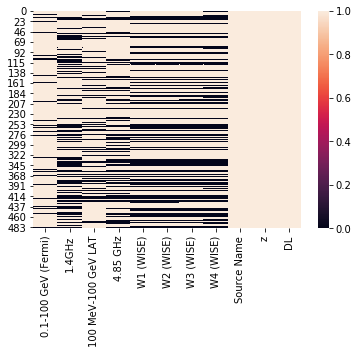

In [355]:
lspar = sns.heatmap(~lat_photo_df.isnull())
fig = lspar.get_figure()
fig.savefig('lspars.png')

In [124]:
#Only the last column need be igonored
for column in mojave_photo_df.iloc[:,:-1]:
    photo_series = mojave_photo_df[column]
    empties = photo_series.isna().sum()
    sparcity = empties/photo_series.size
    if sparcity >= 0.5:
        mojave_photo_df = mojave_photo_df.drop([column], axis=1)
        #print(str(photo_series.name) + ": " + str(sparcity))
    else:
        print(str(photo_series.name) + ": " + str(sparcity))

0.1-100 GeV (Fermi): 0.42857142857142855
0.1-2.4 keV (ROSAT): 0.27705627705627706
1.40 GHz: 0.3116883116883117
1.4GHz: 0.025974025974025976
100 MeV-100 GeV LAT: 0.41125541125541126
10695 MHz: 0.47619047619047616
15 GHz (OVRO): 0.24675324675324675
15 GHz (VLBA): 0.18181818181818182
151 MHz (VLBI): 0.4199134199134199
229 GHz (IRAM): 0.4025974025974026
23 GHz (WMAP): 0.26406926406926406
24 GHz (VLBA): 0.4805194805194805
2700 MHz: 0.38095238095238093
33 GHz (WMAP): 0.3333333333333333
365 MHz (Texas): 0.09090909090909091
37 GHz (MRO): 0.49783549783549785
4.85 GHz: 0.030303030303030304
408 MHz: 0.341991341991342
41 GHz (WMAP): 0.21212121212121213
5 GHz (VLBA): 0.27705627705627706
5000 MHz: 0.36363636363636365
61 GHz (WMAP): 0.24675324675324675
74 MHz (VLA): 0.3116883116883117
8.4 GHz (VLA): 0.23376623376623376
850 microns (JCMT): 0.48917748917748916
86 GHz (IRAM): 0.2727272727272727
94 GHz (WMAP): 0.37662337662337664
K (WMAP): 0.329004329004329
Ka (WMAP): 0.33766233766233766
NUV (GALEX) AB: 

In [125]:
mojave_photo_df.shape

(231, 38)

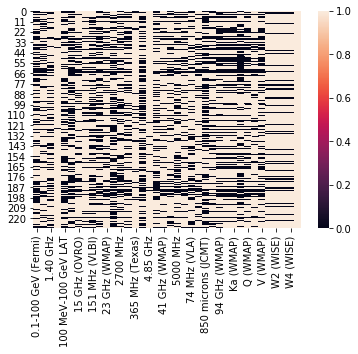

In [354]:
mspar = sns.heatmap(~mojave_photo_df.isnull())
fig = mspar.get_figure()
fig.savefig('mspars.png')

In [270]:
mojave_df = mojave_id_df.merge(mojave_photo_df, left_on = 'B1950 Name', right_on='Source Name')
mojave_df = mojave_df.drop(['Source Name'], axis=1)
mojave_df.head()

,B1950 Name,J2000 Name,Common Name,Right Asc. (J2000),Declination (J2000),z,Opt. ID,SED Class,Radio Spectrum,Fermi 3FGL Name,...,K (WMAP),Ka (WMAP),NUV (GALEX) AB,Q (WMAP),R,V (WMAP),W1 (WISE),W2 (WISE),W3 (WISE),W4 (WISE)
0,0003-066,J0006-0623,NRAO 005,00 06 13.893,- 06 23 35.335,0.3467,B,LSP,Flat,NaN,...,2.3,2.3,0.000038,2.3,0.000429,2.0,0.00427,0.00678,0.0196,0.0518
1,0007+106,J0010+1058,III Zw 2,00 10 31.006,+ 10 58 29.504,0.0893,G,LSP,Flat,NaN,...,1.1,1.2,NaN,1.2,0.039900,1.0,0.02260,0.02930,0.0555,0.1410
2,0016+731,J0019+7327,S5 0016+73,00 19 45.786,+ 73 27 30.018,1.7810,Q,LSP,Flat,NaN,...,NaN,NaN,0.000010,NaN,0.000153,NaN,NaN,NaN,NaN,NaN
3,0048-097,J0050-0929,PKS 0048-09,00 50 41.317,- 09 29 05.210,0.6350,B,ISP,Flat,J0050.6-0929,...,1.0,1.0,0.000491,0.8,0.001080,1.1,NaN,NaN,NaN,NaN
4,0059+581,J0102+5824,TXS 0059+581,01 02 45.762,+ 58 24 11.137,0.6440,Q,LSP,Flat,J0102.8+5825,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00477,0.00738,0.0141,0.0370


In [271]:
mojave_df.shape

(231, 48)

In [252]:
lat_df = lat_id_df.merge(lat_photo_df, left_on = 'Source_Name', right_on='Source Name')
lat_df['MOJAVE ASSOC'] =  lat_df['Source Name'].str.replace('3FGL ', '')
lat_df['MOJAVE ASSOC'] = lat_df['MOJAVE ASSOC'].str.replace('\s+', '', regex=True)
lat_df = lat_df.drop(['Source Name'], axis=1)
lat_df.head()

,Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,...,1.4GHz,100 MeV-100 GeV LAT,4.85 GHz,W1 (WISE),W2 (WISE),W3 (WISE),W4 (WISE),z,DL,MOJAVE ASSOC
0,3FGL J0009.3+5030,2.3337,50.510399,116.116417,-11.803292,0.012396,0.011841,18.240000,0.0201,0.0192,...,0.0121,NaN,NaN,NaN,NaN,NaN,NaN,0.793286,5030.349863,J0009.3+5030
1,3FGL J0017.6-0512,4.4045,-5.205000,101.258423,-66.642990,0.043973,0.040519,7.730000,0.0713,0.0657,...,0.1780,2.750000e-13,0.274,0.001960,0.002930,0.006540,0.0169,0.227000,1138.894747,J0017.6-0512
2,3FGL J0018.4+2947,4.6030,29.794001,114.432129,-32.532040,0.050880,0.045823,67.879997,0.0825,0.0743,...,0.0337,1.370000e-13,NaN,0.000523,0.000507,0.000778,NaN,0.100000,463.429579,J0018.4+2947
3,3FGL J0018.9-8152,4.7454,-81.876900,304.330109,-35.163124,0.036017,0.030343,-10.700000,0.0584,0.0492,...,NaN,NaN,0.048,0.004420,0.005550,0.008230,0.0142,0.793286,5030.349863,J0018.9-8152
4,3FGL J0022.5+0608,5.6430,6.137800,110.023605,-56.008762,0.023559,0.020969,-81.680000,0.0382,0.0340,...,0.3400,1.100000e-13,0.262,0.001580,0.002240,0.007740,0.0167,0.793286,5030.349863,J0022.5+0608


In [253]:
lat_drops_index = lat_df[~(lat_df.CLASS1=='BLL  ')&~(lat_df.CLASS1=='FSRQ ')&~(lat_df.CLASS1=='GAL  ')&~(lat_df.CLASS1=='blank')&~(lat_df.CLASS1=='AGN  ')].index
lat_drops_index

Int64Index([  6,  10,  14,  18,  28,  37,  40,  53,  54,  58,
            ...
            429, 430, 432, 437, 456, 460, 463, 464, 474, 475],
           dtype='int64', length=111)

In [254]:
lat_df = lat_df.drop(lat_drops_index)
lat_df.shape

(375, 81)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

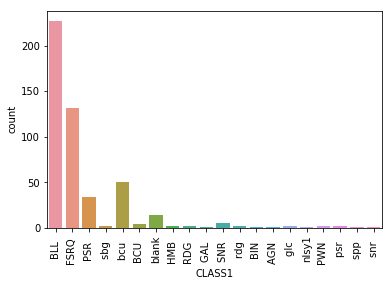

In [210]:
sns.countplot(lat_df['CLASS1'])
plt.xticks(rotation=90)

In [255]:
#Renaming the LAT Classifactions to match the codes in the MOJAVE sample
lat_df['CLASS1'] =lat_df['CLASS1'].str.replace('BLL  ', 'B')
lat_df['CLASS1'] =lat_df['CLASS1'].str.replace('FSRQ ', 'Q')
lat_df['CLASS1'] =lat_df['CLASS1'].str.replace('GAL  ', 'G')
lat_df['CLASS1'] =lat_df['CLASS1'].str.replace('AGN  ', 'N')
lat_df['CLASS1'] =lat_df['CLASS1'].str.replace('blank', 'U')

In [272]:
mojave_df['Fermi 3FGL  Name'].isin(lat_df['MOJAVE ASSOC']).sum()

77

### Final Join

From the above counts, we have 77 sources that overlap. This means that the final merged data frame ought to have 529 sources. This is far less than I had planned for so future work will inlcude an improvement as to how the NED data base is scraped for data.

In [273]:
lat_mojave_df = lat_df.merge(mojave_df, left_on = 'MOJAVE ASSOC', right_on='Fermi 3FGL  Name', how='outer')
lat_mojave_df.shape

(529, 129)

In [274]:
lat_mojave_df.dtypes

Source_Name               object
RAJ2000                  float64
DEJ2000                  float64
GLON                     float64
GLAT                     float64
Conf_68_SemiMajor        float64
Conf_68_SemiMinor        float64
Conf_68_PosAng           float64
Conf_95_SemiMajor        float64
Conf_95_SemiMinor        float64
Conf_95_PosAng           float64
ROI_num                  float64
Signif_Avg               float64
Pivot_Energy             float64
Flux_Density             float64
Unc_Flux_Density         float64
Flux1000                 float64
Unc_Flux1000             float64
Energy_Flux100           float64
Unc_Energy_Flux100       float64
Signif_Curve             float64
SpectrumType              object
Spectral_Index           float64
Unc_Spectral_Index       float64
beta                     float64
Unc_beta                 float64
Cutoff                   float64
Unc_Cutoff               float64
Exp_Index                float64
Unc_Exp_Index            float64
PowerLaw_I

In [275]:
lat_mojave_df.head(10)

,Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,...,K (WMAP),Ka (WMAP),NUV (GALEX) AB,Q (WMAP),R,V (WMAP),W1 (WISE)_y,W2 (WISE)_y,W3 (WISE)_y,W4 (WISE)_y
0,3FGL J0009.3+5030,2.3337,50.510399,116.116417,-11.803292,0.012396,0.011841,18.240000,0.0201,0.0192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3FGL J0017.6-0512,4.4045,-5.205000,101.258423,-66.642990,0.043973,0.040519,7.730000,0.0713,0.0657,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3FGL J0018.4+2947,4.6030,29.794001,114.432129,-32.532040,0.050880,0.045823,67.879997,0.0825,0.0743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3FGL J0018.9-8152,4.7454,-81.876900,304.330109,-35.163124,0.036017,0.030343,-10.700000,0.0584,0.0492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3FGL J0022.5+0608,5.6430,6.137800,110.023605,-56.008762,0.023559,0.020969,-81.680000,0.0382,0.0340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3FGL J0033.6-1921,8.4022,-19.363800,94.212082,-81.224083,0.011903,0.011656,-72.680000,0.0193,0.0189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3FGL J0035.9+5949,8.9891,59.831799,120.985832,-2.981383,0.011101,0.010608,-67.260002,0.0180,0.0172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3FGL J0045.7+1217,11.4347,12.288100,120.740982,-50.559357,0.023744,0.021894,-86.779999,0.0385,0.0355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3FGL J0047.0+5658,11.7669,56.971500,122.333733,-5.895123,0.026088,0.023744,72.809998,0.0423,0.0385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3FGL J0048.0+2236,12.0133,22.600800,121.908806,-40.264175,0.049770,0.040334,8.870000,0.0807,0.0654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Redundent Columns

The merger resulted in the correct number of sources, but the columns with the '_x' or '_y' are from columns the two data frames had in common. My next step is to condense those colums into one. 

In [327]:
lat_df.columns.intersection(mojave_df.columns)

Index(['0.1-100 GeV (Fermi)', '1.4GHz', '100 MeV-100 GeV LAT', '4.85 GHz',
       'W1 (WISE)', 'W2 (WISE)', 'W3 (WISE)', 'W4 (WISE)', 'z', 'DL'],
      dtype='object')

In [287]:
lat_mojave_df['z'] = lat_mojave_df['z_x'].combine_first(lat_mojave_df['z_y'])
lat_mojave_df = lat_mojave_df.drop(['z_x'], axis=1) 
lat_mojave_df = lat_mojave_df.drop(['z_y'], axis=1)
lat_mojave_df.shape

(529, 128)

In [268]:
lat_df['z'].isna().sum()

0

In [276]:
mojave_df['z'].isna().sum()

0

In [278]:
lat_mojave_df['z'].isna().sum()

0

C:\Users\Nate\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


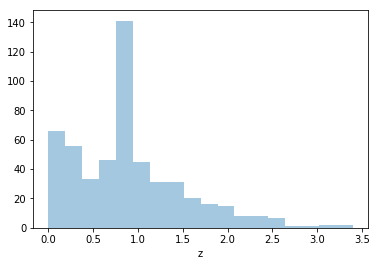

In [353]:
lm_z = sns.distplot(lat_mojave_df['z'], kde=False)
fig = lm_z.get_figure()
fig.savefig('zdist.png')

C:\Users\Nate\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


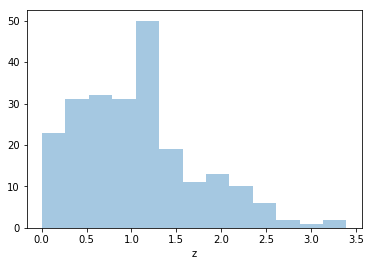

In [281]:
sns.distplot(mojave_df['z'], kde=False)

C:\Users\Nate\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


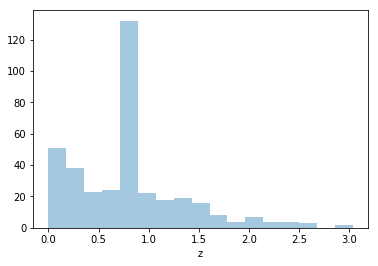

In [282]:
sns.distplot(lat_df['z'], kde=False)

In [289]:
lat_mojave_df['DL'] = lat_mojave_df['DL_x'].combine_first(lat_mojave_df['DL_y'])
lat_mojave_df = lat_mojave_df.drop(['DL_x'], axis=1) 
lat_mojave_df = lat_mojave_df.drop(['DL_y'], axis=1)
lat_mojave_df.shape

(529, 127)

C:\Users\Nate\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


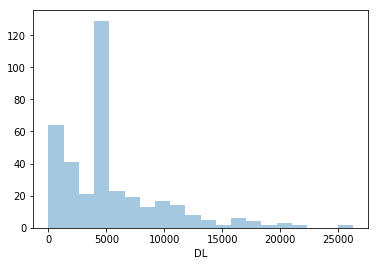

In [290]:
sns.distplot(lat_df['DL'], kde=False)

In [292]:
lat_mojave_df['0.1-100 GeV (Fermi)'] = lat_mojave_df['0.1-100 GeV (Fermi)_x'].combine_first(lat_mojave_df['0.1-100 GeV (Fermi)_y'])
lat_mojave_df = lat_mojave_df.drop(['0.1-100 GeV (Fermi)_x'], axis=1) 
lat_mojave_df = lat_mojave_df.drop(['0.1-100 GeV (Fermi)_y'], axis=1)
lat_mojave_df.shape

(529, 126)

In [294]:
lat_df['0.1-100 GeV (Fermi)'].isna().sum()

33

In [295]:
mojave_df['0.1-100 GeV (Fermi)'].isna().sum()

99

In [296]:
lat_mojave_df['0.1-100 GeV (Fermi)'].isna().sum()

122

In [297]:
lat_mojave_df['1.4GHz'] = lat_mojave_df['1.4GHz_x'].combine_first(lat_mojave_df['1.4GHz_y'])
lat_mojave_df = lat_mojave_df.drop(['1.4GHz_x'], axis=1) 
lat_mojave_df = lat_mojave_df.drop(['1.4GHz_y'], axis=1)
lat_mojave_df.shape

(529, 125)

In [298]:
lat_mojave_df['1.4GHz'].isna().sum()

99

In [299]:
mojave_df['1.4GHz'].isna().sum()

6

In [300]:
lat_df['1.4GHz'].isna().sum()

96

In [301]:
lat_mojave_df['100 MeV-100 GeV LAT'] = lat_mojave_df['100 MeV-100 GeV LAT_x'].combine_first(lat_mojave_df['100 MeV-100 GeV LAT_y'])
lat_mojave_df = lat_mojave_df.drop(['100 MeV-100 GeV LAT_x'], axis=1) 
lat_mojave_df = lat_mojave_df.drop(['100 MeV-100 GeV LAT_y'], axis=1)
lat_mojave_df.shape

(529, 124)

In [302]:
lat_mojave_df['100 MeV-100 GeV LAT'].isna().sum()

163

In [303]:
mojave_df['100 MeV-100 GeV LAT'].isna().sum()

95

In [304]:
lat_df['100 MeV-100 GeV LAT'].isna().sum()

73

In [ ]:
lat_mojave_df['100 MeV-100 GeV LAT'] = lat_mojave_df['100 MeV-100 GeV LAT_x'].combine_first(lat_mojave_df['100 MeV-100 GeV LAT_y'])
lat_mojave_df = lat_mojave_df.drop(['100 MeV-100 GeV LAT_x'], axis=1) 
lat_mojave_df = lat_mojave_df.drop(['100 MeV-100 GeV LAT_y'], axis=1)
lat_mojave_df.shape

In [305]:
lat_mojave_df['4.85 GHz'] = lat_mojave_df['4.85 GHz_x'].combine_first(lat_mojave_df['4.85 GHz_y'])
lat_mojave_df = lat_mojave_df.drop(['4.85 GHz_x'], axis=1) 
lat_mojave_df = lat_mojave_df.drop(['4.85 GHz_y'], axis=1)
lat_mojave_df.shape

(529, 123)

In [307]:
lat_mojave_df['4.85 GHz'].isna().sum()

83

In [308]:
mojave_df['4.85 GHz'].isna().sum()

7

In [309]:
lat_df['4.85 GHz'].isna().sum()

82

In [310]:
lat_mojave_df['W1 (WISE)'] = lat_mojave_df['W1 (WISE)_x'].combine_first(lat_mojave_df['W1 (WISE)_y'])
lat_mojave_df = lat_mojave_df.drop(['W1 (WISE)_x'], axis=1) 
lat_mojave_df = lat_mojave_df.drop(['W1 (WISE)_y'], axis=1)
lat_mojave_df.shape

(529, 122)

In [311]:
lat_mojave_df['W1 (WISE)'].isna().sum()

112

In [312]:
mojave_df['W1 (WISE)'].isna().sum()

39

In [313]:
lat_df['W1 (WISE)'].isna().sum()

92

In [315]:
lat_mojave_df['W2 (WISE)'] = lat_mojave_df['W2 (WISE)_x'].combine_first(lat_mojave_df['W2 (WISE)_y'])
lat_mojave_df = lat_mojave_df.drop(['W2 (WISE)_x'], axis=1) 
lat_mojave_df = lat_mojave_df.drop(['W2 (WISE)_y'], axis=1)
lat_mojave_df.shape

(529, 121)

In [316]:
lat_mojave_df['W2 (WISE)'].isna().sum()

112

In [317]:
mojave_df['W2 (WISE)'].isna().sum()

39

In [318]:
lat_df['W2 (WISE)'].isna().sum()

92

In [319]:
lat_mojave_df['W3 (WISE)'] = lat_mojave_df['W3 (WISE)_x'].combine_first(lat_mojave_df['W3 (WISE)_y'])
lat_mojave_df = lat_mojave_df.drop(['W3 (WISE)_x'], axis=1) 
lat_mojave_df = lat_mojave_df.drop(['W3 (WISE)_y'], axis=1)
lat_mojave_df.shape

(529, 120)

In [320]:
lat_mojave_df['W3 (WISE)'].isna().sum()

112

In [321]:
mojave_df['W3 (WISE)'].isna().sum()

39

In [322]:
lat_df['W3 (WISE)'].isna().sum()

92

In [323]:
lat_mojave_df['W4 (WISE)'] = lat_mojave_df['W4 (WISE)_x'].combine_first(lat_mojave_df['W4 (WISE)_y'])
lat_mojave_df = lat_mojave_df.drop(['W4 (WISE)_x'], axis=1) 
lat_mojave_df = lat_mojave_df.drop(['W4 (WISE)_y'], axis=1)
lat_mojave_df.shape

(529, 119)

In [324]:
lat_mojave_df['W4 (WISE)'].isna().sum()

132

In [325]:
mojave_df['W4 (WISE)'].isna().sum()

39

In [326]:
lat_df['W4 (WISE)'].isna().sum()

112

In [ ]:
lat_mojave_df['CLASS'] = lat_mojave_df['CLASS1'].combine_first(lat_mojave_df['Opt. ID'])
lat_mojave_df.shape

In [ ]:
lat_mojave_df['CLASS'].isna().sum()

In [ ]:
lat_df['CLASS1'].isna().sum()

In [ ]:
mojave_df['Opt. ID'].isna().sum()

In [ ]:
lat_mojave_df = lat_mojave_df.drop(['CLASS1'], axis=1) 
lat_mojave_df = lat_mojave_df.drop(['Opt. ID'], axis=1)

In [334]:
lat_mojave_df.shape

(529, 118)

In [356]:
lat_mojave_df['Name'] = lat_mojave_df['Source_Name'].combine_first(lat_mojave_df['J2000  Name'])
lat_mojave_df.shape

(529, 119)

In [357]:
lat_mojave_df['Name'].isna().sum()

0

In [358]:
lat_mojave_df = lat_mojave_df.drop(['Source_Name'], axis=1)
lat_mojave_df = lat_mojave_df.drop(['J2000  Name'], axis=1)

Now all the redundant columns have been combined. I now have a dataframe that can be used to build a classifaction engine for AGN. I will begin by data exploration then test several different classifaction algorithms.

## Statistical Analysis Samples

I will now perform some basic statistical analysis of both the MOJAVE and Fermi LAT AGN Samples. The purpose of this analysis is to guide decision making into what machine learning algorithms may best be suitable for predict classifaction of the unknown objects in each sample. 

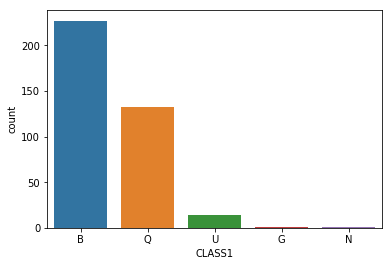

In [352]:
lclass = sns.countplot(lat_df['CLASS1'])
#plt.xticks(rotation=90)
fig = lclass.get_figure()
fig.savefig('latclass.png')

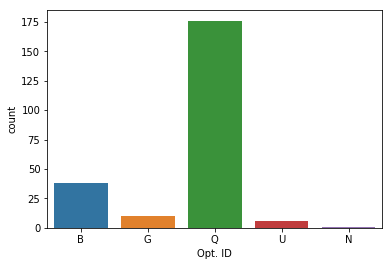

In [351]:
mclass =sns.countplot(mojave_df['Opt. ID'])
#plt.xticks(rotation=90)
fig = mclass.get_figure()
fig.savefig('mojaveclass.png')

In [ ]:
sns.countplot(mojave_df['Opt. ID'])
plt.xticks(rotation=90)

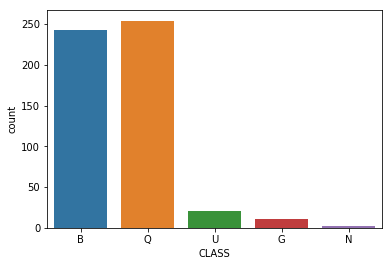

In [350]:
tclass=sns.countplot(lat_mojave_df['CLASS'])
#plt.xticks(rotation=90)
fig = tclass.get_figure()
fig.savefig('totalclass.png')

C:\Users\Nate\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Nate\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


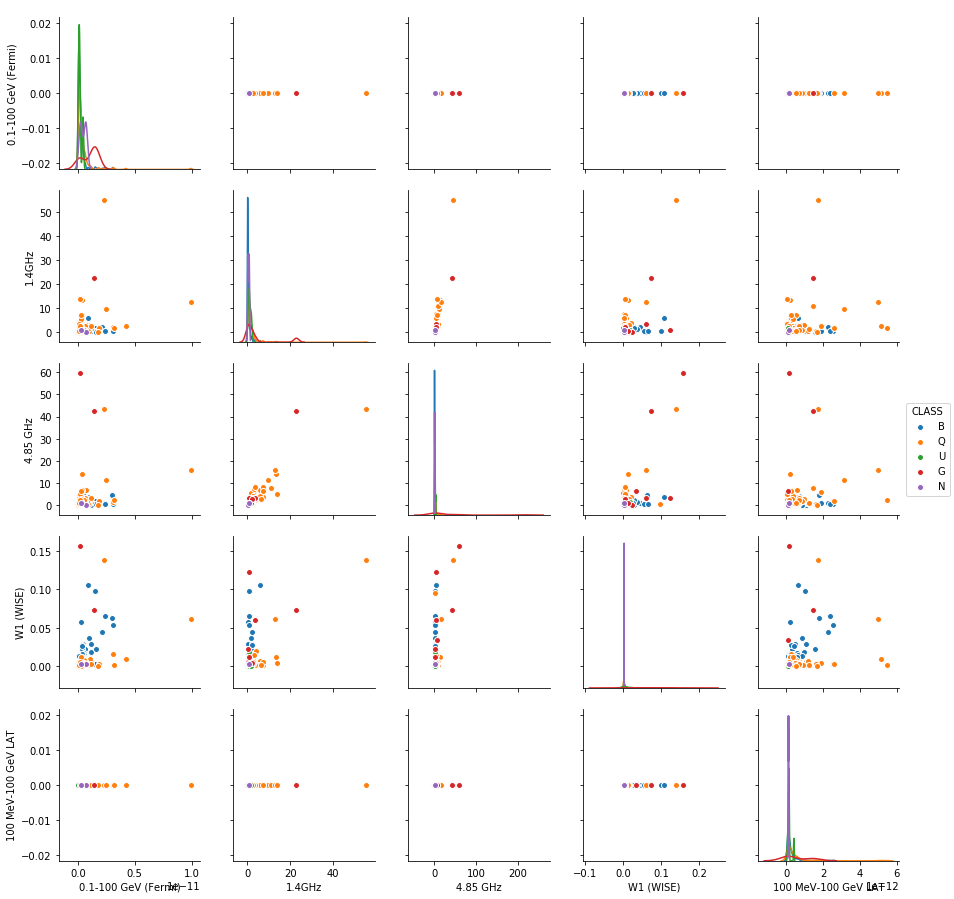

In [343]:
g = sns.pairplot(lat_mojave_df[['0.1-100 GeV (Fermi)','1.4GHz','4.85 GHz', 'W1 (WISE)','100 MeV-100 GeV LAT','CLASS']], hue='CLASS',diag_kind="kde")
g.savefig('AGNpair.png')

## Classification Methods

Since this study is setting the ground work for a larger study in building classifaction engines we will start with two. The first will be a basic KNN classifier to act as a benchmark for future algorithms. Next the SVM method will be used since it can output a linear formula for classification. This may be of inteterest to Astronomers since that formula may reveal some information of the underlying physics of these objects.

Before I train these methods some pretreatment of the data has to occur. First We need to convert from a flux density which is what the detector on Earth measures to a luminoisty, which is what the source actually outputs. I will do this by multiplying the flux denisties by luminosity distance squared.  However these measurements range from 0 to close to 10,000 Mpc. I will scale these measurements by dividing by the mean. Then I will sicne these measurments are each on a different scale, I will then rescale everything by dividing by that columns mean.

I will focus this section on the data columns seen in the paitplot above. 

In [359]:
# Call in the methods needed 

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn import metrics

C:\Users\Nate\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [384]:
#scaling 

ml_class_df = lat_mojave_df[['0.1-100 GeV (Fermi)','1.4GHz','4.85 GHz', 'W1 (WISE)','100 MeV-100 GeV LAT','DL', 'CLASS', 'Name']]
ml_class_df.head()

,0.1-100 GeV (Fermi),1.4GHz,4.85 GHz,W1 (WISE),100 MeV-100 GeV LAT,DL,CLASS,Name
0,2.110000e-13,0.0121,NaN,NaN,NaN,5030.349863,B,3FGL J0009.3+5030
1,1.600000e-13,0.1780,0.274,0.001960,2.750000e-13,1138.894747,Q,3FGL J0017.6-0512
2,4.300000e-14,0.0337,NaN,0.000523,1.370000e-13,463.429579,B,3FGL J0018.4+2947
3,8.350000e-14,NaN,0.048,0.004420,NaN,5030.349863,B,3FGL J0018.9-8152
4,2.040000e-13,0.3400,0.262,0.001580,1.100000e-13,5030.349863,B,3FGL J0022.5+0608


In [385]:
ml_class_df.describe()

,0.1-100 GeV (Fermi),1.4GHz,4.85 GHz,W1 (WISE),100 MeV-100 GeV LAT,DL
count,4.070000e+02,430.000000,446.000000,417.000000,3.660000e+02,529.000000
mean,3.486430e-13,1.275722,2.036798,0.006629,3.654978e-13,6291.296034
std,6.842094e-13,3.267048,10.886210,0.016742,6.139887e-13,5243.384863
min,3.640000e-14,0.004800,0.024000,0.000030,4.960000e-14,0.000000
25%,8.680000e-14,0.186750,0.256000,0.001070,1.082500e-13,2483.142721
50%,1.740000e-13,0.621500,0.780000,0.002200,1.645000e-13,5030.349863
75%,3.475000e-13,1.380000,1.607500,0.004650,3.595000e-13,8519.522810
max,9.930000e-12,55.000000,213.000000,0.157000,5.470000e-12,30102.577643


In [386]:
ml_class_df['DL'] = ml_class_df['DL'] /ml_class_df['DL'].mean()
ml_class_df['DL'].describe()

C:\Users\Nate\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    529.000000
mean       1.000000
std        0.833435
min        0.000000
25%        0.394695
50%        0.799573
75%        1.354176
max        4.784798
Name: DL, dtype: float64

In [387]:
#the zeros are going to be a problem. I am subsitituting a small numbers. 
ml_class_df['DL'] = ml_class_df['DL'].replace(0,0.001)
ml_class_df['DL'].describe()

C:\Users\Nate\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    529.000000
mean       1.000002
std        0.833432
min        0.001000
25%        0.394695
50%        0.799573
75%        1.354176
max        4.784798
Name: DL, dtype: float64

In [389]:
ml_class_df.loc[:, '0.1-100 GeV (Fermi)':'100 MeV-100 GeV LAT'] = ml_class_df[['0.1-100 GeV (Fermi)','1.4GHz','4.85 GHz', 'W1 (WISE)','100 MeV-100 GeV LAT']].multiply(ml_class_df['DL']**2, axis="index")
ml_class_df.describe()

C:\Users\Nate\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,0.1-100 GeV (Fermi),1.4GHz,4.85 GHz,W1 (WISE),100 MeV-100 GeV LAT,DL
count,4.070000e+02,4.300000e+02,4.460000e+02,4.170000e+02,3.660000e+02,529.000000
mean,4.685157e-13,2.334070e+00,2.712476e+00,3.407902e-03,5.908682e-13,1.000002
std,1.233227e-12,7.335311e+00,7.119113e+00,6.101702e-03,1.959186e-12,0.833432
min,1.150000e-19,1.450000e-07,1.120000e-07,5.320296e-07,1.600000e-19,0.001000
25%,2.040873e-14,3.788517e-02,4.922740e-02,3.195436e-04,1.788904e-14,0.394695
50%,1.041890e-13,3.660107e-01,4.973870e-01,1.516303e-03,1.075433e-13,0.799573
75%,3.573082e-13,1.845336e+00,2.249121e+00,3.724577e-03,4.527804e-13,1.354176
max,1.623830e-11,1.198160e+02,8.705900e+01,5.370651e-02,2.810871e-11,4.784798


In [390]:
ml_class_df['0.1-100 GeV (Fermi)'] = np.log10(ml_class_df['0.1-100 GeV (Fermi)'])
ml_class_df['0.1-100 GeV (Fermi)'].describe()

C:\Users\Nate\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    407.000000
mean     -13.170786
std        1.095550
min      -18.939302
25%      -13.691617
50%      -12.982178
75%      -12.446993
max      -10.789459
Name: 0.1-100 GeV (Fermi), dtype: float64

In [391]:
ml_class_df['0.1-100 GeV (Fermi)'] = ml_class_df['0.1-100 GeV (Fermi)'].fillna(ml_class_df['0.1-100 GeV (Fermi)'].mean())

C:\Users\Nate\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [392]:
ml_class_df['0.1-100 GeV (Fermi)'].describe()

count    529.000000
mean     -13.170786
std        0.960679
min      -18.939302
25%      -13.407532
50%      -13.170786
75%      -12.574446
max      -10.789459
Name: 0.1-100 GeV (Fermi), dtype: float64

In [393]:
ml_class_df['100 MeV-100 GeV LAT'] = np.log10(ml_class_df['100 MeV-100 GeV LAT'])
ml_class_df['100 MeV-100 GeV LAT'] = ml_class_df['100 MeV-100 GeV LAT'].fillna(ml_class_df['100 MeV-100 GeV LAT'].mean())            
ml_class_df['100 MeV-100 GeV LAT'].describe()

C:\Users\Nate\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nate\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    529.000000
mean     -13.143402
std        0.944792
min      -18.795880
25%      -13.231915
50%      -13.143402
75%      -12.647425
max      -10.551159
Name: 100 MeV-100 GeV LAT, dtype: float64

In [394]:
ml_class_df['1.4GHz'] = np.log10(ml_class_df['1.4GHz'])
ml_class_df['1.4GHz'] = ml_class_df['1.4GHz'].fillna(ml_class_df['1.4GHz'].mean())            
ml_class_df['1.4GHz'].describe()

C:\Users\Nate\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nate\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    529.000000
mean      -0.714369
std        1.201248
min       -6.838632
25%       -1.137379
50%       -0.714369
75%        0.089833
max        2.078515
Name: 1.4GHz, dtype: float64

In [395]:
ml_class_df['4.85 GHz'] = np.log10(ml_class_df['4.85 GHz'])
ml_class_df['4.85 GHz'] = ml_class_df['4.85 GHz'].fillna(ml_class_df['4.85 GHz'].mean())            
ml_class_df['4.85 GHz'].describe()

C:\Users\Nate\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nate\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    529.000000
mean      -0.601568
std        1.199971
min       -6.950782
25%       -0.997238
50%       -0.601568
75%        0.255641
max        1.939814
Name: 4.85 GHz, dtype: float64

In [396]:
ml_class_df['W1 (WISE)'] = np.log10(ml_class_df['W1 (WISE)'])
ml_class_df['W1 (WISE)'] = ml_class_df['W1 (WISE)'].fillna(ml_class_df['W1 (WISE)'].mean())            
ml_class_df['W1 (WISE)'].describe()

C:\Users\Nate\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nate\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    529.000000
mean      -3.021007
std        0.769691
min       -6.274064
25%       -3.295860
50%       -3.021007
75%       -2.552946
max       -1.269973
Name: W1 (WISE), dtype: float64

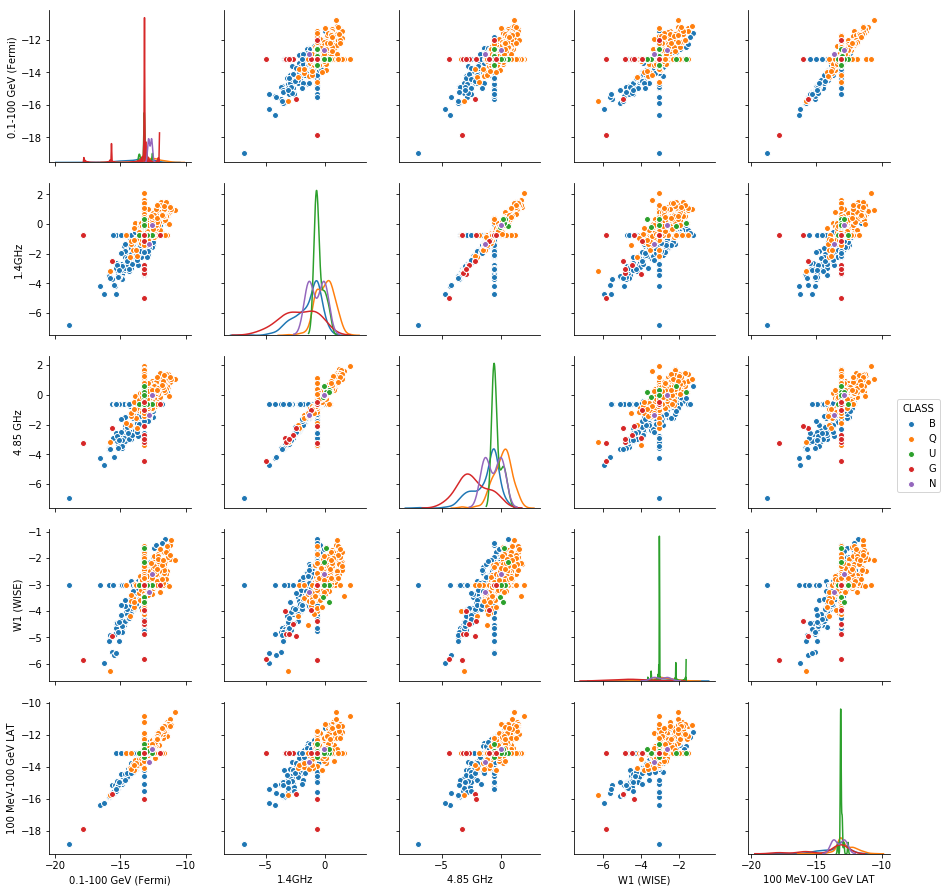

In [397]:
g = sns.pairplot(ml_class_df[['0.1-100 GeV (Fermi)','1.4GHz','4.85 GHz', 'W1 (WISE)','100 MeV-100 GeV LAT','CLASS']], hue='CLASS',diag_kind="kde")
g.savefig('AGNpairTRAN.png')

As we can see above after the transforms, I get good seperation and proportional behavior. I should now be able to build the classifaction engines. I'll start with the KNN Classifier.

In [402]:
# First Train-Test Split, 70-30 split 

X_train, X_test, y_train, y_test = train_test_split(ml_class_df[['0.1-100 GeV (Fermi)','1.4GHz','4.85 GHz', 'W1 (WISE)','100 MeV-100 GeV LAT']], ml_class_df['CLASS'], test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(370, 5)
(159, 5)
(370,)
(159,)


In [407]:
#I am going to test for optimal K in range of 3 to 10
for k in range(3,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("K = "+ str(k) + " Accuracy: ",metrics.accuracy_score(y_test, y_pred))

K = 3 Accuracy:  0.7924528301886793
K = 4 Accuracy:  0.779874213836478
K = 5 Accuracy:  0.8113207547169812
K = 6 Accuracy:  0.8050314465408805
K = 7 Accuracy:  0.8176100628930818
K = 8 Accuracy:  0.7987421383647799
K = 9 Accuracy:  0.7987421383647799
K = 10 Accuracy:  0.7924528301886793


## KNN Result

With a Training Test split of 70-30, A k=7 achieves the best accuracy of 81.7%. Note that moving the k parameter only effected the accuracy by a range of 4%. With the sample dominated by 2 classes, BL Lacs and FSRQ's this is marginally better than guessing. Note that the KNN was selected to provide a benchmark.

## Support Vector Machine -Classifier

I am going to follow asimilar workflow for a SVC in this case I will test accurracy of each kernel to see which works best.

In [408]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernel_list: 
    clf = SVC(kernel=kernel) 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Kernel = "+ kernel + " Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Kernel = linear Accuracy:  0.8176100628930818
Kernel = poly Accuracy:  0.7987421383647799
Kernel = rbf Accuracy:  0.8113207547169812
Kernel = sigmoid Accuracy:  0.4779874213836478


### SVM Result

A linear kernel gives the same accruacy as a KNN classifier with a k=7. Note that the ploy and rbf kernels perform within the accuracy range of the KNN. 